#Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage

#read_data

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#split_data

In [5]:
train_data= df.drop(columns=['CustomerID','Gender','Age'],axis=1)[0:150]
test_data=  df.drop(columns=['CustomerID','Gender','Age'],axis=1)[150:200]

#scaling

In [6]:
scaler=StandardScaler()
train_data=scaler.fit_transform(train_data)
test_data=scaler.transform(test_data)

#Divisive_clustering

In [11]:
distances = pdist(train_data)
dist_matrix = squareform(distances)
agg_complete=AgglomerativeClustering( affinity='precomputed', linkage='complete')
agg_complete.fit(dist_matrix)

/home/hagar/anaconda3/envs/myenvironment/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='precomputed', linkage='complete')

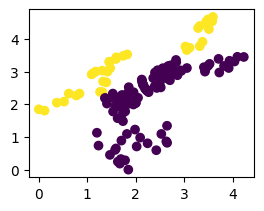

In [12]:
plt.subplot(2,2,2)
plt.scatter(dist_matrix[:,0]   ,  dist_matrix[:,1]   ,c= agg_complete.labels_)

In [13]:
complete_silhoutte=silhouette_score(dist_matrix,agg_complete.labels_)
complete_silhoutte

0.3475008194649863

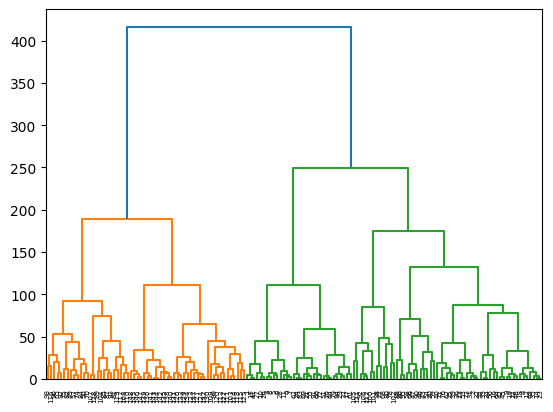

In [14]:
z=linkage(agg_complete.children_ , method='complete')
dendrogram(z)
plt.show()